# Visualizing Chipotle's Data

### Step 1. 필요한 라이브러리 들을 import 하세요

In [4]:
!pip3 install pandas
!pip3 install matplotlib
import pandas as pd
from matplotlib import pyplot as plt

  Using cached pandas-1.5.2-cp39-cp39-macosx_11_0_arm64.whl (10.9 MB)
  Using cached numpy-1.23.5-cp39-cp39-macosx_11_0_arm64.whl (13.4 MB)
  Using cached pytz-2022.6-py2.py3-none-any.whl (498 kB)
You should consider upgrading via the '/Users/heojeongyun/Desktop/lab/pandas/examples/.pandas/bin/python -m pip install --upgrade pip' command.
  Using cached matplotlib-3.6.2-cp39-cp39-macosx_11_0_arm64.whl (7.2 MB)
  Using cached kiwisolver-1.4.4-cp39-cp39-macosx_11_0_arm64.whl (63 kB)
  Using cached contourpy-1.0.6-cp39-cp39-macosx_11_0_arm64.whl (226 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached Pillow-9.3.0-cp39-cp39-macosx_11_0_arm64.whl (2.9 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
You should consider upgrading via the '/Users/heojeongyun/Desktop/lab/pandas/examples/.pandas/bin/python -m pip install --upgrade pip' command.


### Step 2. 다음 주소의 파일을 import 하세요 [address](https://raw.githubusercontent.com/myoh0623/dataset/main/chipotle.tsv). 

### Step 3. chipo 라는 변수에 DataFrame 을 할당하세요

In [5]:
url = 'https://raw.githubusercontent.com/myoh0623/dataset/main/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 4. DataFrae 의 첫 10줄을 표시하세요

In [6]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. 구매 상위 5개 품목의 히스토그램을 생성하세요
- collections 의 Counter 를 사용하세요

In [7]:
chi_hist = chipo.groupby(['item_name']).sum()

/var/folders/c2/h79928n92258kzkwtzbxjbj80000gn/T/ipykernel_68497/2860165422.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chi_hist = chipo.groupby(['item_name']).sum()


In [8]:
chi_hist = chi_hist.sort_values(by = "quantity", ascending=False).head(5)

In [9]:
chi_hist

,order_id,quantity
item_name,,
Chicken Bowl,713926,761
Chicken Burrito,497303,591
Chips and Guacamole,449959,506
Steak Burrito,328437,386
Canned Soft Drink,304753,351


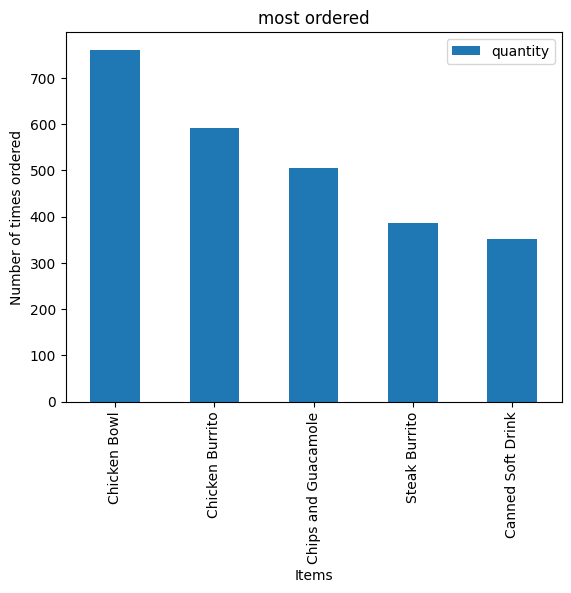

In [10]:
chi_hist.plot.bar(y="quantity")
plt.title("most ordered")
plt.ylabel("Number of times ordered")
plt.xlabel("Items")
plt.show()

In [11]:
df_5_1 = chipo.groupby(by="item_name").sum()["quantity"].sort_values(ascending=False).head()

/var/folders/c2/h79928n92258kzkwtzbxjbj80000gn/T/ipykernel_68497/2256069032.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_5_1 = chipo.groupby(by="item_name").sum()["quantity"].sort_values(ascending=False).head()


<AxesSubplot: xlabel='item_name'>

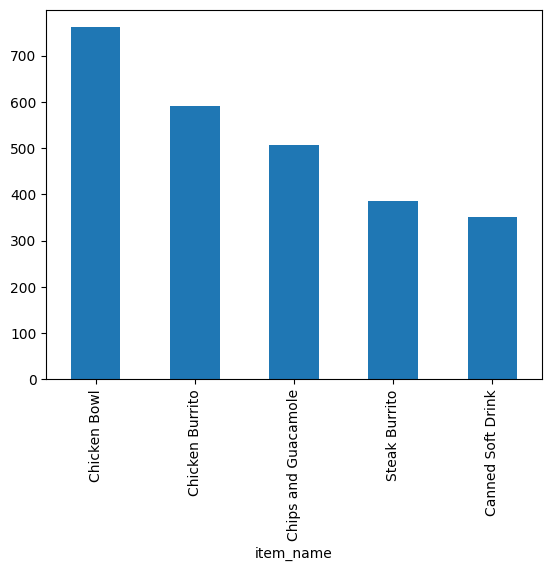

In [12]:
df_5_1.plot.bar()

### Step 6. 주문가격당 주문횟수를 산점도를 생성하여 확인하시오
#### Hint: 주문 가격은 X축, 주문 횟수는Y축 

In [13]:
def sp_d(x):
    tmp = x.split("$")[1]
    return float(tmp)

In [14]:
chipo.item_price = chipo.item_price.apply(sp_d)
ordered = chipo.groupby("order_id").sum()

/var/folders/c2/h79928n92258kzkwtzbxjbj80000gn/T/ipykernel_68497/1935737460.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ordered = chipo.groupby("order_id").sum()


In [15]:
ordered

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


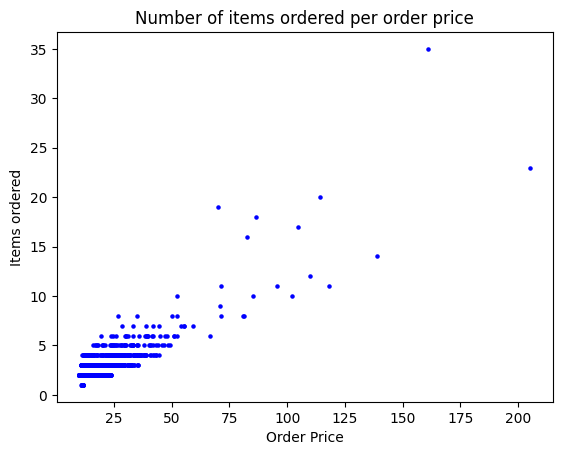

In [16]:
ordered.plot.scatter(x="item_price",y="quantity", s= 5, c = "blue")
plt.title("Number of items ordered per order price")
plt.xlabel("Order Price")
plt.ylabel("Items ordered")
plt.show()